# EDA

In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


In [46]:
df = pd.read_csv('Dataset/Train.csv')
df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol
0,NaN,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,02/10/08 9:00,02/10/08,5555
1,NaN,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 10:00,02/10/08,4525
2,NaN,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 11:00,02/10/08,4772
3,NaN,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 12:00,02/10/08,5031
4,NaN,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 13:00,02/10/08,4928


In [47]:
df['Holiday'] = df['Holiday'].fillna(0)

In [60]:
weather_encoder = LabelEncoder()
weather_desc_encoder = LabelEncoder()

In [61]:
df['Weather_Encoded'] = weather_encoder.fit_transform(df['Weather'])

In [62]:
df['Weather_Desc_Encoded'] = weather_encoder.fit_transform(df['Weather_Desc'])


In [63]:
df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol,Weather_Encoded,Weather_Desc_Encoded
0,0.0,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,02/10/08 9:00,02/10/08,5555,3,19
1,0.0,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 10:00,02/10/08,4525,3,9
2,0.0,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 11:00,02/10/08,4772,3,10
3,0.0,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 12:00,02/10/08,5031,3,10
4,0.0,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 13:00,02/10/08,4928,3,9


In [64]:
df.drop(['Weather', 'Weather_Desc'], axis=1, inplace=True)

In [65]:
df.isna().sum()

Holiday                 0
Temperature             0
Rainfall_last_hour      0
Snowfall_last_hour      0
Cloud_Cover             0
TimeStamp               0
Date                    0
Traffic_Vol             0
Weather_Encoded         0
Weather_Desc_Encoded    0
dtype: int64

In [66]:
correlation_matrix = df.corr(numeric_only=True)

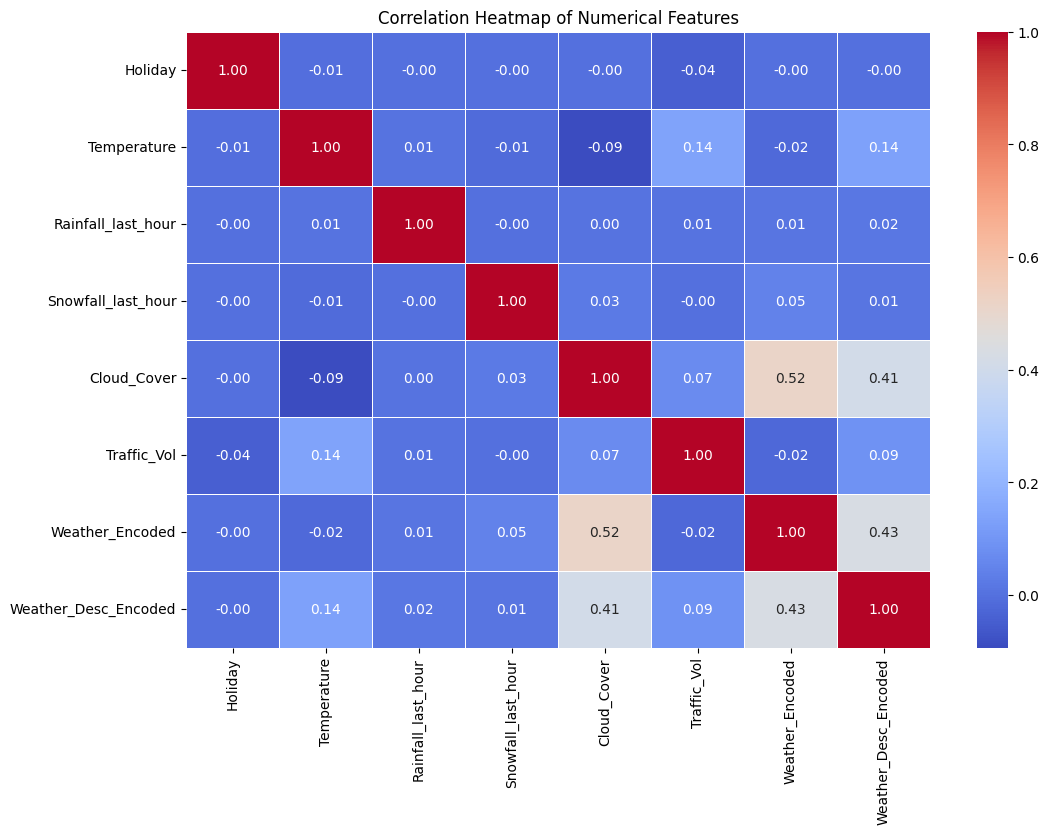

In [67]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [68]:
# Calculate correlation with Traffic_Volume
correlation_analysis = df.corr()['Traffic_Vol'].sort_values(ascending=False)

# Remove self-correlation and format
correlation_analysis = correlation_analysis[correlation_analysis.index != 'Traffic_Vol']

# Display results with better formatting
print("Correlations with Traffic Volume:")
print("---------------------------------")
for feature, corr in correlation_analysis.items():
    print(f"{feature:<20}: {corr:>8.3f}")

ValueError: could not convert string to float: '02/10/08 9:00'